In [3]:
!pip install nltk

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 

In [2]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)


In [3]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']


In [4]:
train_data = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=categories, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [36]:
print(type(train_data))
print(train_data.keys())
print(train_data.data)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
["From: sac@asdi.saic.com (Steve A. Conroy x6172)\nSubject: Re: Darrrrrrrrryl\nOrganization: SAIC\nLines: 33\n\nIn article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) writes:\n|> \n|> \n|> The media is beating the incident at Dodger Stadium on Wednesday to\n|> death, but I haven't seen anything in rsb yet.\n|> \n|> Gerald Perry of the Cardinals pinch hit in the eighth inning with two\n|> on and his club down by a run.  He stroked a line drive into the\n|> right field corner.  The ball cleared the three-foot high fence and\n|> went into the crowd.  Darryl, racing over from right center, got to\n|> the spot in time to reach his glove up over the short fence, but he\n|> missed the ball.  A fan sitting in the front row, wearing a mitt,\n|> reached up and caught the ball.  Home run.\n|> \n|> Now I've seen the replay several times and I have concluded that\n|> Darryl missed the ball

In [6]:
print(len(train_data.data))
print(len(test_data.data))

4732
3150


In [7]:
train_data_for_plot = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=None, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
print(len(train_data_for_plot.target_names))

20


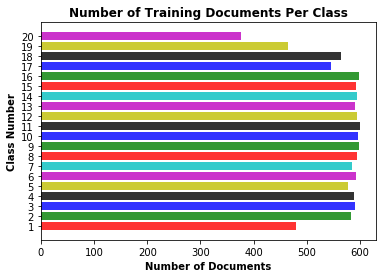

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
indices = np.arange(20)
no_of_datapoints = []
for i in range(0, len(train_data_for_plot.target_names)):
    no_of_datapoints.append((train_data_for_plot.target == i).sum())


bar_width = 0.75
colors = 'rgbkymc'
bars = plt.barh(indices, no_of_datapoints, bar_width,alpha = 0.8, color = colors, align="edge")
plt.xlabel('Number of Documents', fontweight="bold", )
plt.ylabel('Class Number', fontweight="bold")
plt.title('Number of Training Documents Per Class', fontweight="bold")
plt.yticks(indices + bar_width/2, list(range(1, 21)))
plt.show()


In [9]:
import nltk
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')

print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))

from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
# of combined_stopwords:	 410


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', 'be', 'walk', 'to', 'school']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words='english')
X_train_counts = count_vect.fit_transform(train_data.data)
print(X_train_counts.shape)



(4732, 16292)


In [13]:
X_test_counts = count_vect.transform(test_data.data)
print(X_test_counts.shape)

(3150, 16292)


In [14]:
count_vect2 = CountVectorizer(min_df=3, stop_words='english')
X_train_counts2 = count_vect2.fit_transform(train_data.data)
print(X_train_counts2.shape)

(4732, 20297)


In [15]:
print(count_vect.get_feature_names())

['0005111312na1em', '0010580b', '002251w', '0096b0f0', '00bjgood', '00mbstultz', '00pm', '02uv', '03hz', '03k', '05apr93', '05l', '06eh', '06paul', '0_', '0___', '0a', '0b', '0b14', '0c', '0d', '0d2', '0df', '0e', '0ek', '0f', '0g', '0g8', '0h', '0hd', '0i', '0iv', '0ivbudk', '0j', '0k', '0l', '0m', '0m75u', '0m8b', '0mk', '0n', '0o', '0p', '0q', '0qax', '0qq', '0r', '0sl', '0t', '0tbxn', '0tbxom', '0tq', '0tq6', '0u', '0v', '0va', '0w', '0x', '0x100', '0y', '0z', '1000cc', '100k', '100mph', '101e', '1024x768', '1024x768x16', '1024x768x256', '1024x768x65536', '106ps', '10h', '10k', '10mb', '10min', '10pm', '10th', '10w', '10w40', '115a', '11h', '11k', '11th', '1200cc', '120km', '120mb', '120mph', '125mb', '1280x1024', '128k', '12a', '12cyl', '12k', '12mb', '12ms', '12v', '1304s', '130mph', '132mb', '13h', '13k', '13p', '13q', '13qm', '13qs', '13s1', '13th', '145s', '14di', '14dm75u', '14th', '1500mb', '150k', '152944br4416a', '1542b', '15apr93', '15k', '15m', '15mill', '15mph', '15ms',

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(4732, 16292)


In [17]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(3150, 16292)


In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

(4732, 50)


In [19]:
X_test_reduced = svd.transform(X_test_tfidf)
print(X_test_reduced.shape)

(3150, 50)


In [20]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=0)
X_train_reduced_nmf = nmf.fit_transform(X_train_tfidf)
print(X_train_reduced_nmf.shape)

(4732, 50)


In [21]:
X_test_reduced_nmf = nmf.transform(X_test_tfidf)
print(X_test_reduced_nmf.shape)

(3150, 50)


In [22]:
############## Question 4###############

In [24]:
###### Building the category for each point in the train dataset####

In [43]:
y_train = np.zeros((len(train_data.data)))
for i in range(len(train_data.target)):
    if(train_data.target[i] < 3):
        y_train[i] = 0
    else:
        y_train[i] = 1

In [46]:
y_test = np.zeros((len(test_data.data)))
for i in range(len(test_data.target)):
    if(test_data.target[i] < 3):
        y_test[i] = 0
    else:
        y_test[i] = 1

In [47]:
np.unique(y_test)

array([0., 1.])

In [23]:
from sklearn.svm import LinearSVC

In [59]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
hard_margin_svc.fit(X_train_reduced, y_train)
#LinearSVC(loss='hinge',C=0.01).fit(W_train, twenty_train.target).predict(W_test)
y_pred_hard = hard_margin_svc.predict(X_test_reduced)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [65]:
np.unique(y_train)

array([0., 1.])

In [62]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
soft_margin_svc.fit(X_train_reduced, y_train)
#LinearSVC(loss='hinge',C=0.01).fit(W_train, twenty_train.target).predict(W_test)
y_pred_soft = soft_margin_svc.predict(X_test_reduced)

In [63]:
np.unique(y_pred_soft)

array([1.])

In [66]:
y_pred_soft

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
numpy.isnan(myarray).any()

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


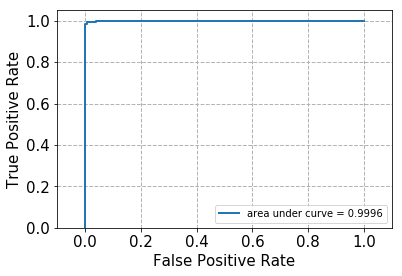

In [60]:
fit_predict_and_plot_roc(hard_margin_svc, X_train_reduced, y_train, X_test_reduced, y_pred_hard)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


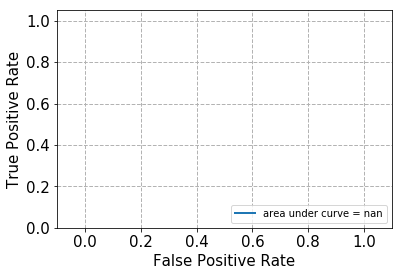

In [64]:
fit_predict_and_plot_roc(soft_margin_svc, X_train_reduced, y_train, X_test_reduced, y_pred_soft)

In [95]:
############# Metrics #################

In [97]:
def disp_metrics(y_test, y_pred):
    print("The confusion matrix is: ")
    print(confusion_matrix(y_test, y_pred))
    print("The accuracy is: ")
    print(accuracy_score(y_test, y_pred))
    print("The recall is: ")
    print(recall_score(y_test, y_pred))
    print("The precision is: ")
    print(precision_score(y_test, y_pred))
    print("The F1-score is: ")
    print(f1_score(y_test, y_pred))

In [98]:
#Hard margin
disp_metrics(y_test, y_pred_hard)

The confusion matrix is: 
[[ 878  297]
 [  42 1933]]
The accuracy is: 
0.8923809523809524
The recall is: 
0.9787341772151898
The precision is: 
0.8668161434977578
The F1-score is: 
0.9193816884661118


In [99]:
#Soft margin
disp_metrics(y_test, y_pred_soft)

The confusion matrix is: 
[[   0 1175]
 [   0 1975]]
The accuracy is: 
0.626984126984127
The recall is: 
1.0
The precision is: 
0.626984126984127
The F1-score is: 
0.7707317073170732


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [88]:
k_vals = [i for i in range(-3, 4)]

In [89]:
k_vals

[-3, -2, -1, 0, 1, 2, 3]

In [92]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LinearSVC(loss = 'hinge', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

In [93]:
best_c

100

In [94]:
max_score

0.9321126760563381

In [100]:
clf = LinearSVC(loss = 'hinge', C = 100)
clf.fit(X_train_reduced, y_train)
y_pred_best = clf.predict(X_test_reduced)
disp_metrics(y_test, y_pred_best)

The confusion matrix is: 
[[1003  172]
 [  97 1878]]
The accuracy is: 
0.9146031746031746
The recall is: 
0.9508860759493671
The precision is: 
0.9160975609756098
The F1-score is: 
0.9331677018633541


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


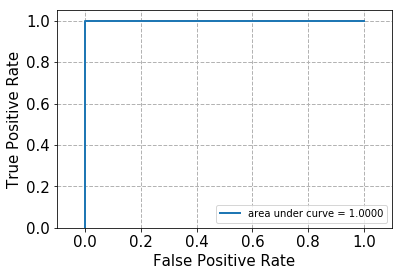

In [101]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_pred_best)

In [102]:
################## Question 5 #############
############# Logistic Regression #########

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr_clf = LogisticRegression(penalty='l2', C = 1e30)

In [108]:
lr_clf.fit(X_train_reduced, y_train)
y_lr_pred = lr_clf.predict(X_test_reduced)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
disp_metrics(y_test, y_lr_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


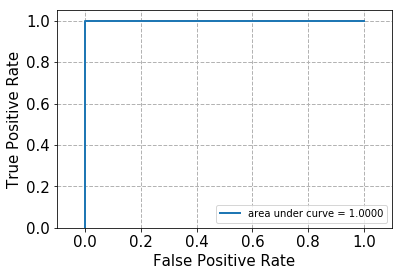

In [111]:
fit_predict_and_plot_roc(lr_clf, X_train_reduced, y_train, X_test_reduced, y_lr_pred)

In [129]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LogisticRegression(penalty='l2', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [130]:
best_c

1000

In [131]:
clf = LogisticRegression(penalty='l2', C = 1000)
clf.fit(X_train_reduced, y_train)
y_clf_pred = clf.predict(X_test_reduced)
disp_metrics(y_test, y_clf_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


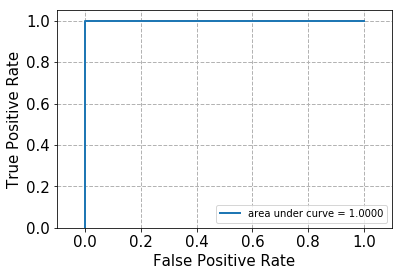

In [122]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_clf_pred)

In [125]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LogisticRegression(penalty='l1', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [126]:
best_c

1000

In [127]:
clf = LogisticRegression(penalty='l1', C = 1000)
clf.fit(X_train_reduced, y_train)
y_clf_pred = clf.predict(X_test_reduced)
disp_metrics(y_test, y_clf_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


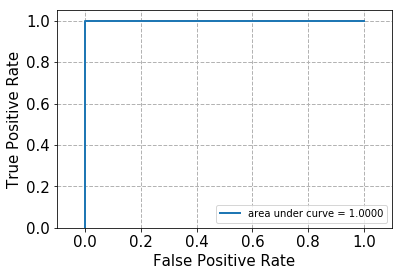

In [128]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_clf_pred)